In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv("C:\\Users\\ELCOT\\Desktop\\Groceries_dataset.csv")

In [3]:
ds

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
ds.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
ds['date']=pd.to_datetime(ds['Date'])

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5192\2828216047.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds['date']=pd.to_datetime(ds['Date'])


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
ds.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


Text(0, 0.5, 'number of quantity sold')

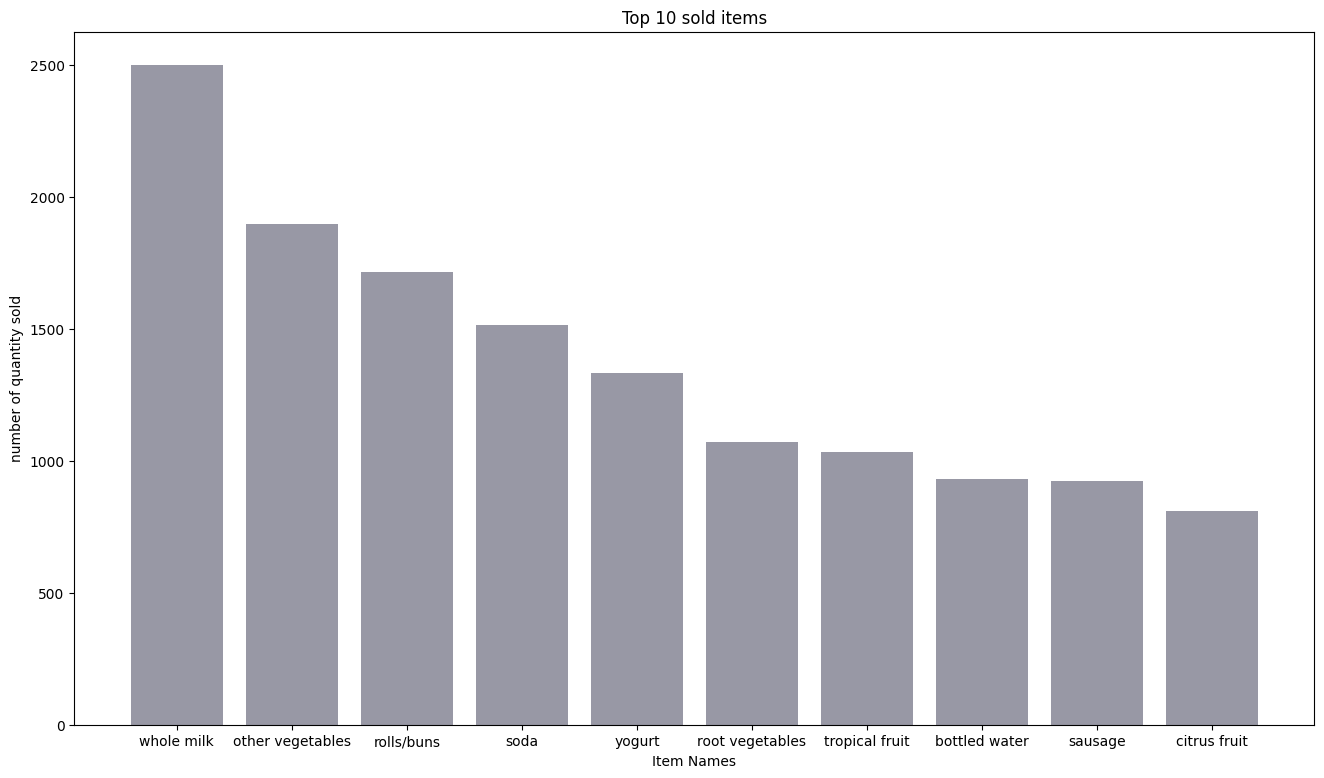

In [23]:
Item_distr = ds.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)
bars=Item_distr["itemDescription"]
height= Item_distr["Frequency"]
x_pos=np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.2,0.3,0.5))

plt.xticks(x_pos,bars)
plt.title("Top 10 sold items")
plt.xlabel("Item Names")
plt.ylabel("number of quantity sold")

In [30]:
ds_date=ds.set_index(['Date'])
ds_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


In [33]:
cust_level=ds[["Member_number","itemDescription"]].sort_values(by ="Member_number",ascending=False)
cust_level['itemDescription']=cust_level["itemDescription"].str.strip()

In [34]:
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [58]:
busket_bag=(ds.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))

In [59]:
busket_bag.sample(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0
4951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
busket_bag.corr()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
itemDescription,,,,,,,,,,,,,,,,,,,,,
Instant food products,1.000000,-0.006936,-0.009420,-0.010825,-0.003470,-0.004007,-0.010419,-0.008275,0.005847,-0.014528,...,0.025355,0.021851,0.005348,0.014025,-0.005670,0.016640,0.002853,0.015981,0.005071,0.018221
UHT-milk,-0.006936,1.000000,0.013806,0.006105,-0.007877,0.018349,0.009462,-0.018785,0.002897,0.020801,...,-0.003803,-0.024466,0.009144,0.006618,-0.012871,-0.011550,0.009990,0.028747,0.006505,0.028753
abrasive cleaner,-0.009420,0.013806,1.000000,-0.006523,-0.002091,-0.002415,-0.013429,-0.004986,0.018970,0.001813,...,0.012922,-0.008507,-0.007390,0.002163,-0.003417,0.010777,0.000107,0.003558,0.008360,-0.009420
artif. sweetener,-0.010825,0.006105,-0.006523,1.000000,0.105251,-0.002775,-0.015432,-0.005730,-0.006645,0.016042,...,0.049392,-0.009776,0.010179,-0.006614,-0.003926,-0.006806,-0.018394,0.029591,-0.024397,-0.010825
baby cosmetics,-0.003470,-0.007877,-0.002091,0.105251,1.000000,-0.000889,-0.004947,-0.001837,0.014798,-0.007983,...,-0.003919,-0.003134,-0.007413,-0.011288,-0.001259,-0.008476,-0.005896,-0.021056,-0.000410,-0.003470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.016640,-0.011550,0.010777,-0.006806,-0.008476,-0.009789,-0.011195,0.005394,0.015850,0.030758,...,0.014921,0.001920,-0.000010,0.069757,0.004792,1.000000,0.046272,0.053497,0.030962,0.016640
white wine,0.002853,0.009990,0.000107,-0.018394,-0.005896,-0.006809,-0.010370,0.022577,0.015060,0.021670,...,-0.005083,0.028101,0.015072,0.000317,0.017039,0.046272,1.000000,0.032862,0.039600,-0.006953
whole milk,0.015981,0.028747,0.003558,0.029591,-0.021056,-0.024316,0.020192,0.032618,0.073856,0.028186,...,0.013874,-0.007158,0.069096,0.060338,0.039298,0.053497,0.032862,1.000000,0.103533,0.043075


In [61]:
def purchaseornot(x):
    if x<1:
        return 0
    if x>=1:
        return 1
busket_bag=busket_bag.applymap(purchaseornot)
busket_bag.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
othr_veg_df=busket_bag[busket_bag['other vegetables']==1]

In [63]:
from mlxtend.frequent_patterns import apriori,association_rules
similar_items = apriori(othr_veg_df, min_support=0.15, use_colnames=True)

C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [64]:
veg_asso = association_rules(similar_items, metric="lift", min_threshold=1)

In [65]:
veg_asso.sort_values(['lift','support'],ascending=False).reset_index(drop=True)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(yogurt),0.508174,0.319482,0.190736,0.375335,1.174823,0.028383,1.089412,0.302562
1,"(whole milk, other vegetables)",(yogurt),0.508174,0.319482,0.190736,0.375335,1.174823,0.028383,1.089412,0.302562
2,(whole milk),"(yogurt, other vegetables)",0.508174,0.319482,0.190736,0.375335,1.174823,0.028383,1.089412,0.302562
3,(yogurt),(whole milk),0.319482,0.508174,0.190736,0.597015,1.174823,0.028383,1.220456,0.218669
4,"(yogurt, other vegetables)",(whole milk),0.319482,0.508174,0.190736,0.597015,1.174823,0.028383,1.220456,0.218669
5,(yogurt),"(whole milk, other vegetables)",0.319482,0.508174,0.190736,0.597015,1.174823,0.028383,1.220456,0.218669
6,(rolls/buns),(whole milk),0.389646,0.508174,0.217984,0.559441,1.100883,0.019976,1.116366,0.150140
7,(whole milk),(rolls/buns),0.508174,0.389646,0.217984,0.428954,1.100883,0.019976,1.068836,0.186323
8,"(rolls/buns, other vegetables)",(whole milk),0.389646,0.508174,0.217984,0.559441,1.100883,0.019976,1.116366,0.150140
9,"(whole milk, other vegetables)",(rolls/buns),0.508174,0.389646,0.217984,0.428954,1.100883,0.019976,1.068836,0.186323


In [66]:
def similar_item(x):
    df=busket_bag[busket_bag[x]==1]
    similar_items = apriori(df, min_support=0.15, use_colnames=True)
    asso = association_rules(similar_items, metric="lift", min_threshold=1)
    asso.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    print("Most similar items",x)
    return asso['consequents'].unique()[:10] # top 10 similar items

In [67]:
similar_item('soda')

Most similar items soda


C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([frozenset({'bottled beer'}), frozenset({'soda'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'}),
       frozenset({'frankfurter'}), frozenset({'newspapers'}),
       frozenset({'other vegetables'}), frozenset({'rolls/buns'})],
      dtype=object)

In [68]:
similar_item('whole milk')

Most similar items whole milk


C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([frozenset({'whole milk'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'}),
       frozenset({'domestic eggs'}), frozenset({'newspapers'}),
       frozenset({'other vegetables'}), frozenset({'rolls/buns'})],
      dtype=object)